# Simple SVD word vectors in Python

The idea behind this is that traditionally to learn similarities in words, rule based and statistical NLP work needed atomic symbols for words. we would use 1 hot encoding to assign each word to a single column in one row of a vector

In [2]:
import numpy as np
a = np.array([0,0,0,0,0,0,0,0,0,1,0]) # we might represent 'hotel' as this
b = np.array([0,0,0,0,0,0,0,1,0,0,0]) # we might represent 'motel' as this
print np.dot(a,b) 

0


# :(


## Distribution similarity based representations
The problem here is that by representing words in 1-hot encoding, we lose alot about it's context and relationship with otherwords.  Instead, we can get a lot of value by represnting a word by means of it's neighbors.

The <b>cat</b> purrs when she eats
The <b>cat</b> memows when she is hungry

### So, how do we make neighbors represent words?
- With coccurence matrix!

Options: full document vs window
- Then we can analyze the matrix to see that all cat terms will have similar entries "Latent semantic analysis"
- Instead, window around each word -> captures both syntactic and semantic information


[[ -5.24124930e-01  -5.72859145e-01   9.54463014e-02   3.83228493e-01
   -1.76963375e-01  -1.76092183e-01  -4.19185600e-01  -5.57702732e-02]
 [ -5.94438071e-01   6.30120664e-01  -1.70207779e-01   3.10038363e-01
    1.84062339e-01  -2.34777849e-01   1.29535474e-01   1.36813128e-01]
 [ -2.56274005e-01   2.74017533e-01   1.59810848e-01   3.73903003e-16
   -5.78984617e-01   6.36550929e-01  -3.32297324e-16  -3.05414877e-01]
 [ -2.85637408e-01  -2.47912130e-01   3.54610324e-01  -7.31901294e-02
    4.45784489e-01   8.36141432e-02   5.48721075e-01  -4.68012411e-01]
 [ -1.93139313e-01   3.38495048e-02  -5.00790405e-01  -4.28462480e-01
    3.47110226e-01   1.55483227e-01  -4.68663749e-01  -4.03576557e-01]
 [ -3.05134684e-01  -2.93988990e-01  -2.23433593e-01  -1.91614246e-01
    1.27460940e-01   4.91219408e-01   2.09592800e-01   6.57535375e-01]
 [ -1.82489837e-01  -1.61027767e-01  -3.97842428e-01  -3.83228493e-01
   -5.12923221e-01  -4.27574417e-01   4.19185600e-01  -1.18313828e-01]
 [ -2.4689842

[-1, 0.1, -1, 1]

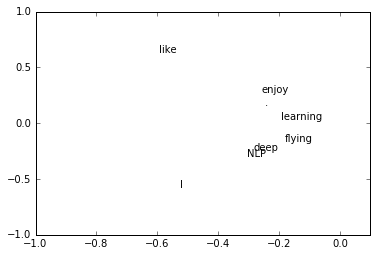

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

''' Example Corpus:
1. I like deep learning.
2. I like NLP.
3. I enjoy flying.
'''
terms_only = ["I", "like", "enjoy", "deep",
              "learning", "NLP", "flying", "."]

# for a window of 1, let's look at the prev one and next one word insert how
# many times you see that word surrounding the current i,j word in the matrix X:
X = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]])

U, s, Vh = np.linalg.svd(X, full_matrices=False)
print U

for i in xrange(len(words)):
    print U[i,0], U[i,0], words[i]
    plt.text(U[i,0], U[i,1], words[i])
v = [-1,0.1,-1,1]
plt.axis(v)
